#Densenet121

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for your training and test datasets
train_dir = "/content/drive/MyDrive/Dataset/autistic child dataset/train"
test_dir = "/content/drive/MyDrive/Dataset/autistic child dataset/val"


batch_size = 64
image_height = 224
image_width = 224

# Define a cropping function
def crop_image(image, crop_height, crop_width):
    height, width, _ = image.shape
    start_x = (width - crop_width) // 2
    start_y = (height - crop_height) // 2
    cropped_image = image[start_y:start_y + crop_height, start_x:start_x + crop_width]
    return cropped_image

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,  # Rotate images by 40 degrees
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest',  # Fill mode for filling newly created pixels
    preprocessing_function=lambda x: crop_image(x, image_height, image_width)
)

# Load and split the training dataset using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),  # Set your desired image dimensions
    batch_size=batch_size,
    class_mode='categorical',  # Adjust based on your problem (binary, categorical, etc.)
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 691 images belonging to 4 classes.
Found 79 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


base_densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the convolutional base
for layer in base_densenet_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_densenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Adjust num_classes based on your dataset

# Create the model
dense_model = Model(inputs=base_densenet_model.input, outputs=predictions)

# Compile the model
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dense_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  

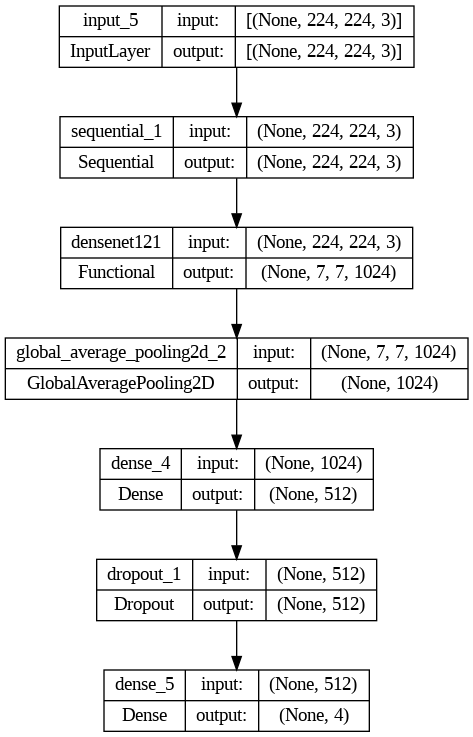

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model


plot_model(dense_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model with early stopping
historydnnet = dense_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=40,
    batch_size=batch_size
)

Epoch 1/40
11/11 [==============================] - 21s 1s/step - loss: 1.2895 - accuracy: 0.5687 - val_loss: 1.0378 - val_accuracy: 0.5949
Epoch 2/40
11/11 [==============================] - 13s 1s/step - loss: 0.9720 - accuracy: 0.6281 - val_loss: 0.8014 - val_accuracy: 0.7468
Epoch 3/40
11/11 [==============================] - 13s 1s/step - loss: 0.8448 - accuracy: 0.6845 - val_loss: 0.7938 - val_accuracy: 0.7215
Epoch 4/40
11/11 [==============================] - 13s 1s/step - loss: 0.8189 - accuracy: 0.6932 - val_loss: 0.7556 - val_accuracy: 0.6835
Epoch 5/40
11/11 [==============================] - 13s 1s/step - loss: 0.7636 - accuracy: 0.7279 - val_loss: 0.7858 - val_accuracy: 0.6835
Epoch 6/40
11/11 [==============================] - 11s 997ms/step - loss: 0.7234 - accuracy: 0.7236 - val_loss: 0.7672 - val_accuracy: 0.6962
Epoch 7/40
11/11 [==============================] - 13s 1s/step - loss: 0.7288 - accuracy: 0.7106 - val_loss: 0.7119 - val_accuracy: 0.7215
Epoch 8/40
11/11 

In [ ]:
test_loss, test_accuracy = dense_model.evaluate(test_generator)
train_loss, train_accuracy = dense_model.evaluate(train_generator)

print(f"DenseNet121 Test Accuracy: {test_accuracy}")
print(f"DenseNet121 Test Loss: {test_loss}")
print(f"DenseNet121 Training Accuracy: {train_accuracy}")
print(f"DenseNet121 Training Loss: {train_loss}")

11/11 [==============================] - 19s 2s/step - loss: 0.4147 - accuracy: 0.8480
DenseNet121 Test Accuracy: 0.7594936490058899
DenseNet121 Test Loss: 0.6628215909004211
DenseNet121 Training Accuracy: 0.8480463027954102
DenseNet121 Training Loss: 0.4147035777568817


2/2 [==============================] - 2s 201ms/step


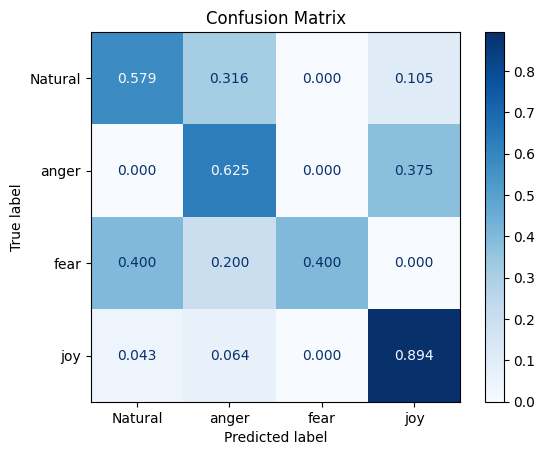

              precision    recall  f1-score   support

     Natural       0.73      0.58      0.65        19
       anger       0.33      0.62      0.43         8
        fear       1.00      0.40      0.57         5
         joy       0.89      0.89      0.89        47

    accuracy                           0.76        79
   macro avg       0.74      0.62      0.64        79
weighted avg       0.81      0.76      0.77        79



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# Get the true labels and predictions for the test dataset
y_true = test_generator.classes
predictions = dense_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Calculate the percentage confusion matrix
percentage_confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Display the percentage confusion matrix
class_names = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".3f")
plt.title("Confusion Matrix")
plt.show()

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

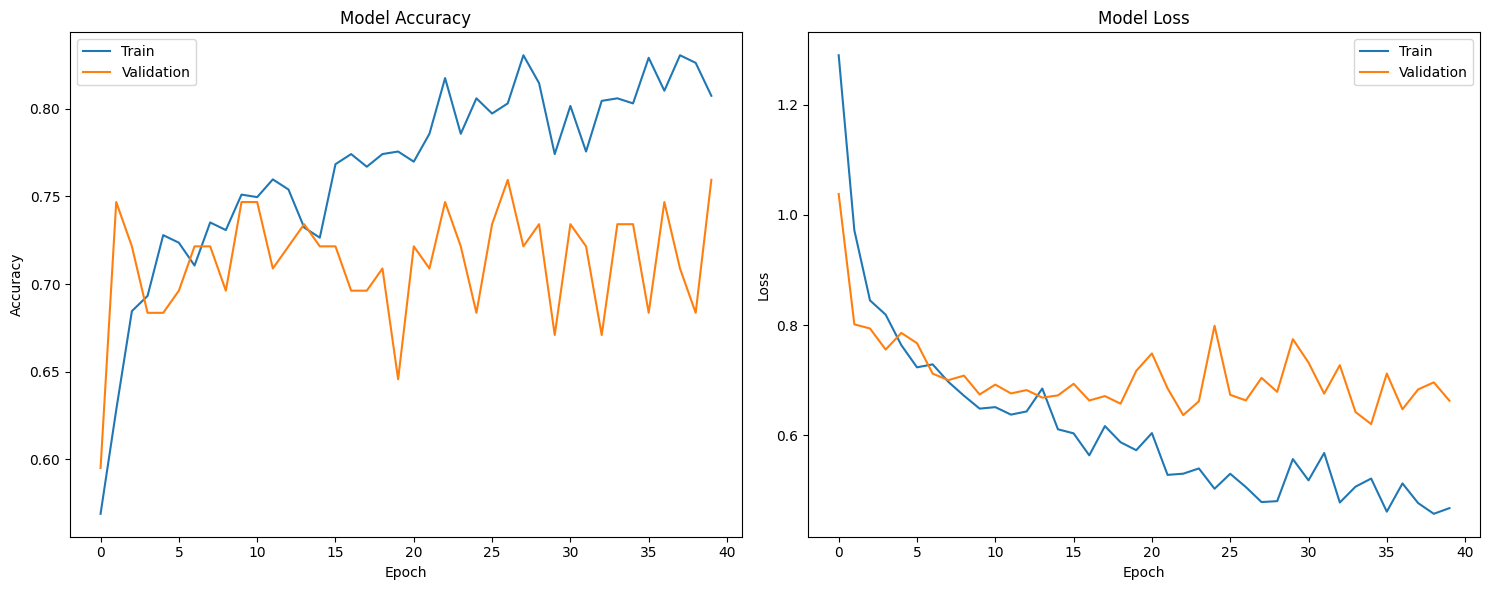

In [ ]:
import matplotlib.pyplot as plt

# Access the training history
history = historydnnet

# Plot training & validation accuracy values
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

epoch 80

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


base_densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the convolutional base
for layer in base_densenet_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_densenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)  # Adjust num_classes based on your dataset

# Create the model
dense_model = Model(inputs=base_densenet_model.input, outputs=predictions)

# Compile the model
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dense_model.summary()

# Train the model with early stopping
historydnnet = dense_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=80,
    batch_size=batch_size
)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_4[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [ ]:
test_loss, test_accuracy = dense_model.evaluate(test_generator)
train_loss, train_accuracy = dense_model.evaluate(train_generator)

print(f"DenseNet121 Test Accuracy: {test_accuracy}")
print(f"DenseNet121 Test Loss: {test_loss}")
print(f"DenseNet121 Training Accuracy: {train_accuracy}")
print(f"DenseNet121 Training Loss: {train_loss}")

11/11 [==============================] - 16s 1s/step - loss: 0.3110 - accuracy: 0.8944
DenseNet121 Test Accuracy: 0.7341772317886353
DenseNet121 Test Loss: 0.6452177166938782
DenseNet121 Training Accuracy: 0.8943560123443604
DenseNet121 Training Loss: 0.31096163392066956


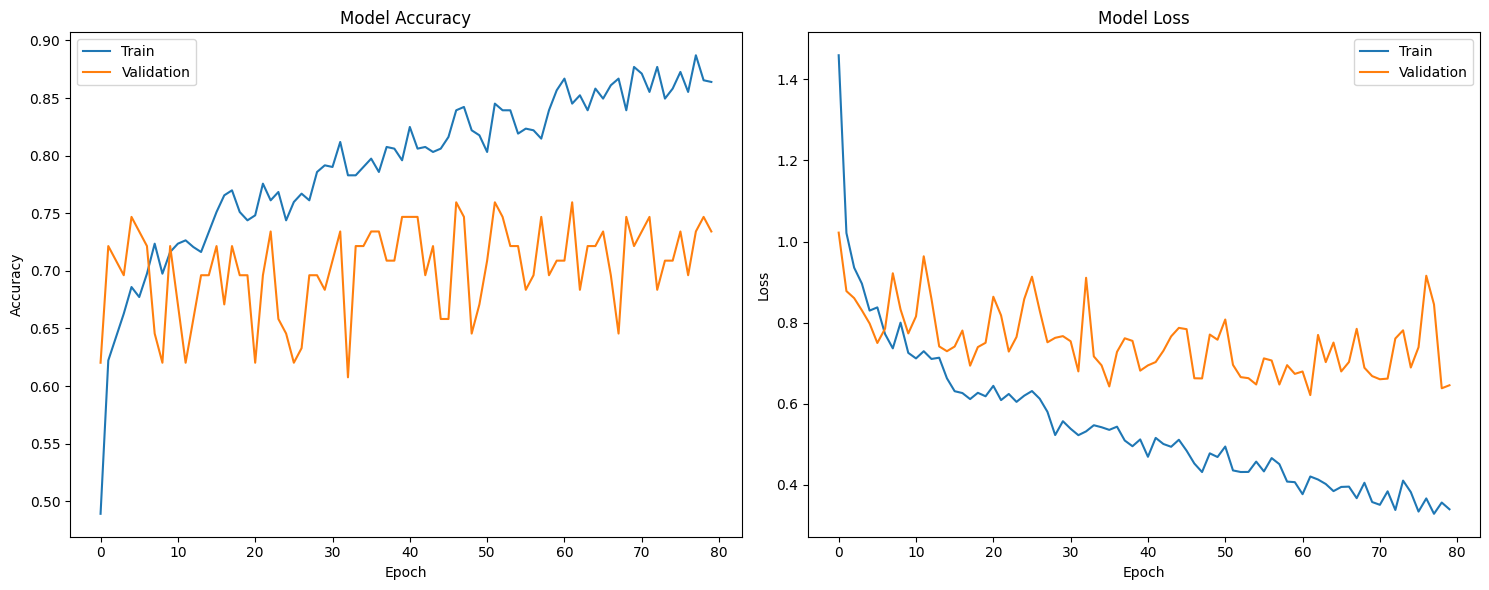

In [ ]:
import matplotlib.pyplot as plt

# Access the training history
history = historydnnet

# Plot training & validation accuracy values
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

2/2 [==============================] - 5s 217ms/step


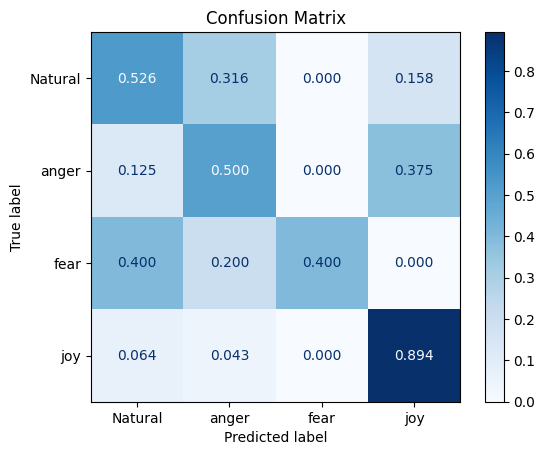

              precision    recall  f1-score   support

     Natural       0.62      0.53      0.57        19
       anger       0.31      0.50      0.38         8
        fear       1.00      0.40      0.57         5
         joy       0.88      0.89      0.88        47

    accuracy                           0.73        79
   macro avg       0.70      0.58      0.60        79
weighted avg       0.77      0.73      0.74        79



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# Get the true labels and predictions for the test dataset
y_true = test_generator.classes
predictions = dense_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Calculate the percentage confusion matrix
percentage_confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Display the percentage confusion matrix
class_names = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".3f")
plt.title("Confusion Matrix")
plt.show()

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


base_densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the convolutional base
for layer in base_densenet_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_densenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(4, activation='softmax')(x)  # Adjust num_classes based on your dataset

# Create the model
dense_model = Model(inputs=base_densenet_model.input, outputs=predictions)

# Compile the model
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dense_model.summary()

# Train the model with early stopping
historydnnet = dense_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=80,
    batch_size=batch_size
)

In [ ]:
# Unfreeze the last few layers of the base model
for layer in base_densenet_model.layers:
    layer.trainable = True

# Recompile the model
dense_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with fine-tuning
history_fine_tuning_dense = dense_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,  # You can adjust the number of epochs
    batch_size=batch_size
)


Epoch 1/50
11/11 [==============================] - 23s 1s/step - loss: 0.8907 - accuracy: 0.7048 - val_loss: 0.7064 - val_accuracy: 0.6962
Epoch 2/50
11/11 [==============================] - 12s 1s/step - loss: 0.6367 - accuracy: 0.7569 - val_loss: 0.6760 - val_accuracy: 0.7595
Epoch 3/50
11/11 [==============================] - 13s 1s/step - loss: 0.5841 - accuracy: 0.7815 - val_loss: 0.6542 - val_accuracy: 0.7215
Epoch 4/50
11/11 [==============================] - 13s 1s/step - loss: 0.5196 - accuracy: 0.8003 - val_loss: 0.6501 - val_accuracy: 0.7089
Epoch 5/50
11/11 [==============================] - 13s 1s/step - loss: 0.4585 - accuracy: 0.8177 - val_loss: 0.6399 - val_accuracy: 0.7342
Epoch 6/50
11/11 [==============================] - 13s 1s/step - loss: 0.4861 - accuracy: 0.8263 - val_loss: 0.6053 - val_accuracy: 0.7468
Epoch 7/50
11/11 [==============================] - 13s 1s/step - loss: 0.4174 - accuracy: 0.8307 - val_loss: 0.6150 - val_accuracy: 0.7848
Epoch 8/50
11/11 [==

In [ ]:
# Evaluate the fine-tuned model
test_loss_ft, test_accuracy_ft = dense_model.evaluate(test_generator)
train_loss_ft, train_accuracy_ft = dense_model.evaluate(train_generator)

print(f"Fine-Tuned DenseNet Test Accuracy: {test_accuracy_ft}")
print(f"Fine-Tuned DenseNet Test Loss: {test_loss_ft}")
print(f"Fine-Tuned DenseNet Training Accuracy: {train_accuracy_ft}")
print(f"Fine-Tuned DenseNet Training Loss: {train_loss_ft}")

11/11 [==============================] - 11s 998ms/step - loss: 0.0596 - accuracy: 0.9797
Fine-Tuned DenseNet Test Accuracy: 0.7721518874168396
Fine-Tuned DenseNet Test Loss: 1.496590495109558
Fine-Tuned DenseNet Training Accuracy: 0.9797394871711731
Fine-Tuned DenseNet Training Loss: 0.059594228863716125


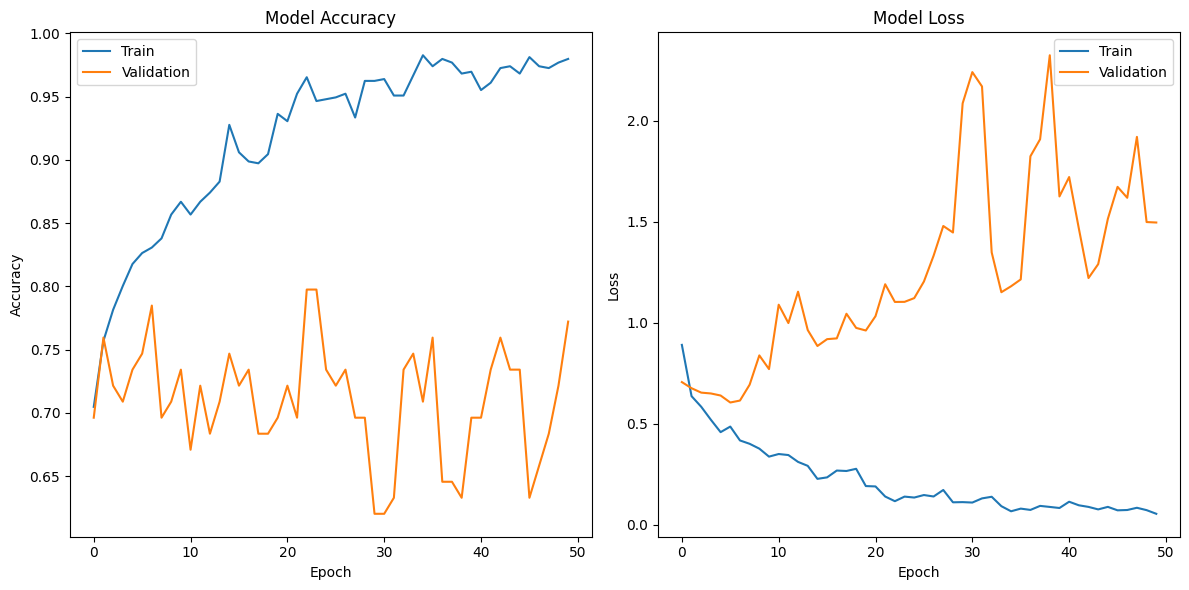

In [ ]:
import matplotlib.pyplot as plt

# Access the training history
history = history_fine_tuning_dense

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

2/2 [==============================] - 3s 195ms/step


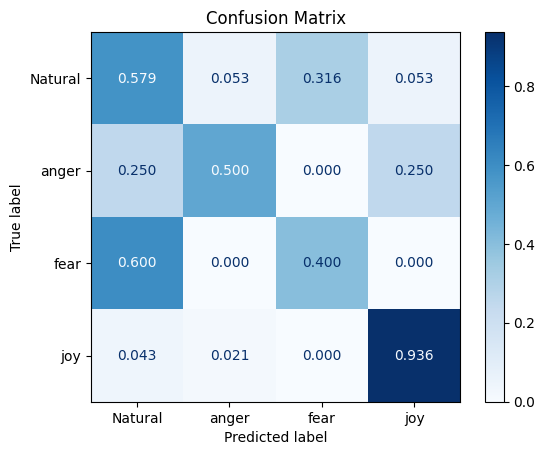

              precision    recall  f1-score   support

     Natural       0.61      0.58      0.59        19
       anger       0.67      0.50      0.57         8
        fear       0.25      0.40      0.31         5
         joy       0.94      0.94      0.94        47

    accuracy                           0.77        79
   macro avg       0.62      0.60      0.60        79
weighted avg       0.79      0.77      0.78        79



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# Get the true labels and predictions for the test dataset
y_true = test_generator.classes
predictions = dense_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Calculate the percentage confusion matrix
percentage_confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Display the percentage confusion matrix
class_names = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".3f")
plt.title("Confusion Matrix")
plt.show()

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

#Xception

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for your training and test datasets
train_dir = "/content/drive/MyDrive/Dataset/autistic child dataset/train"
test_dir = "/content/drive/MyDrive/Dataset/autistic child dataset/val"


batch_size = 64
image_height = 224
image_width = 224

# Define a cropping function
def crop_image(image, crop_height, crop_width):
    height, width, _ = image.shape
    start_x = (width - crop_width) // 2
    start_y = (height - crop_height) // 2
    cropped_image = image[start_y:start_y + crop_height, start_x:start_x + crop_width]
    return cropped_image

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,  # Rotate images by 40 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest',  # Fill mode for filling newly created pixels
    preprocessing_function=lambda x: crop_image(x, image_height, image_width)
)

# Load and split the training dataset using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),  # Set your desired image dimensions
    batch_size=batch_size,
    class_mode='categorical',  # Adjust based on your problem (binary, categorical, etc.)
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 691 images belonging to 4 classes.
Found 79 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

base_xception_model = Xception(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))
# Freeze the convolutional base
for layer in base_xception_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_xception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(4, activation='softmax')(x)  # Adjust num_classes based on your dataset

# Create the model
xception_model = Model(inputs=base_xception_model.input, outputs=predictions)

# Compile the model
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

xception_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

Found 691 files belonging to 4 classes.
Found 79 files belonging to 4 classes.
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 299, 299, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 299, 299, 3)       0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_6  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_12 (Dense)            (None, 256)               524544    
                                                                 
 dropout_5 (Dropout)         (None, 256)      

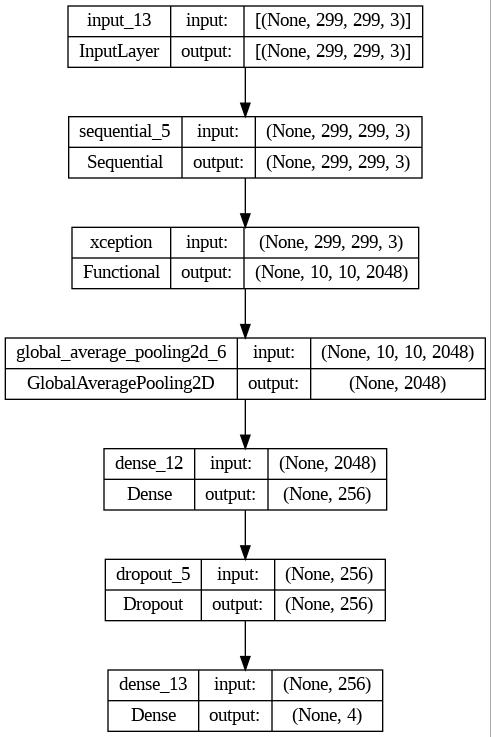

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout


plot_model(xcp_model, to_file='model.jpg', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model with early stopping
historyxcpnet = xception_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=40,
    batch_size=batch_size
)

Epoch 1/40
11/11 [==============================] - 14s 1s/step - loss: 0.7900 - accuracy: 0.6874 - val_loss: 0.8073 - val_accuracy: 0.6582
Epoch 2/40
11/11 [==============================] - 14s 1s/step - loss: 0.7874 - accuracy: 0.7120 - val_loss: 0.7873 - val_accuracy: 0.6835
Epoch 3/40
11/11 [==============================] - 12s 1s/step - loss: 0.7659 - accuracy: 0.6975 - val_loss: 0.7839 - val_accuracy: 0.7089
Epoch 4/40
11/11 [==============================] - 13s 1s/step - loss: 0.7449 - accuracy: 0.7164 - val_loss: 0.7700 - val_accuracy: 0.6962
Epoch 5/40
11/11 [==============================] - 14s 1s/step - loss: 0.7286 - accuracy: 0.7294 - val_loss: 0.7841 - val_accuracy: 0.7089
Epoch 6/40
11/11 [==============================] - 14s 1s/step - loss: 0.7843 - accuracy: 0.7048 - val_loss: 0.7633 - val_accuracy: 0.7342
Epoch 7/40
11/11 [==============================] - 14s 1s/step - loss: 0.7085 - accuracy: 0.7323 - val_loss: 0.7778 - val_accuracy: 0.7089
Epoch 8/40
11/11 [==

In [ ]:
test_loss, test_accuracy = xception_model.evaluate(test_generator)
train_loss, train_accuracy = xception_model.evaluate(train_generator)

print(f"Xception Test Accuracy: {test_accuracy}")
print(f"Xception Test Loss: {test_loss}")
print(f"Xception Training Accuracy: {train_accuracy}")
print(f"Xception Training Loss: {train_loss}")

11/11 [==============================] - 12s 1s/step - loss: 0.5545 - accuracy: 0.7815
Xception Test Accuracy: 0.7215189933776855
Xception Test Loss: 0.7951799035072327
Xception Training Accuracy: 0.7814761400222778
Xception Training Loss: 0.5545457005500793


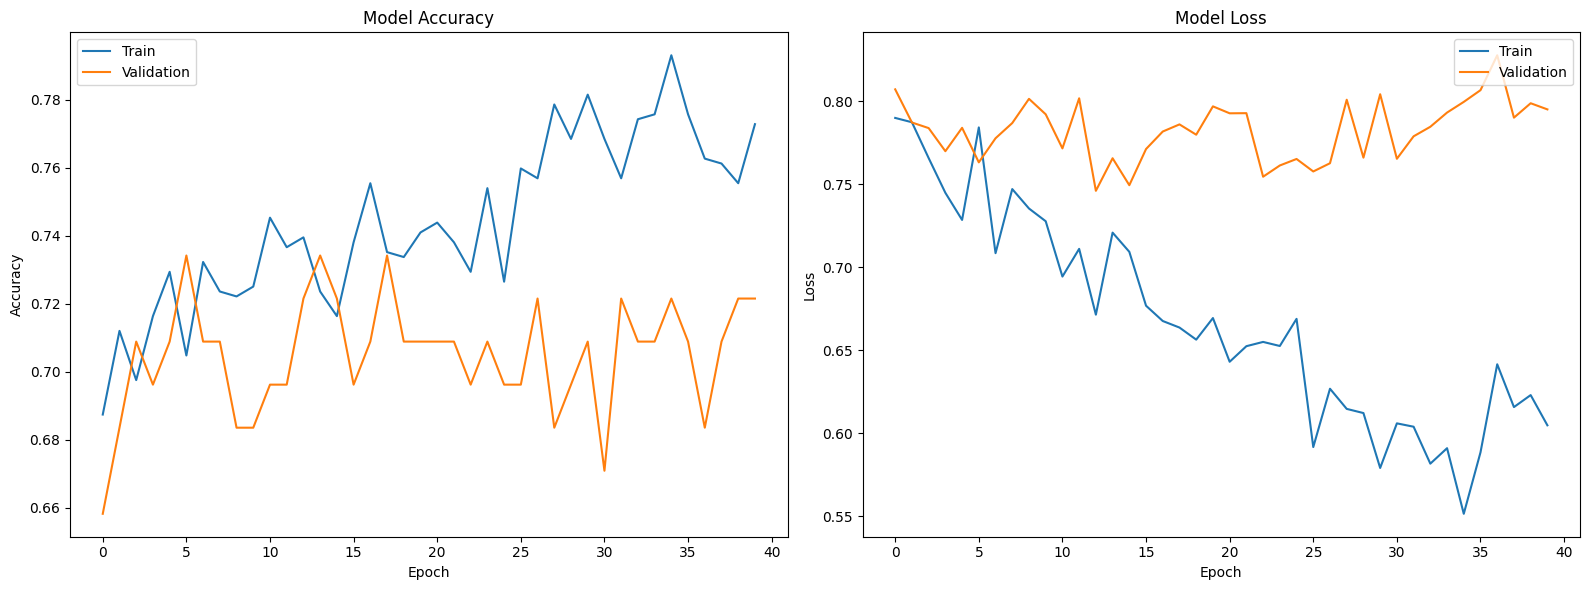

In [ ]:
import matplotlib.pyplot as plt

# Access the training history
history = historyxcpnet

# Plot training & validation accuracy values
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

2/2 [==============================] - 2s 359ms/step


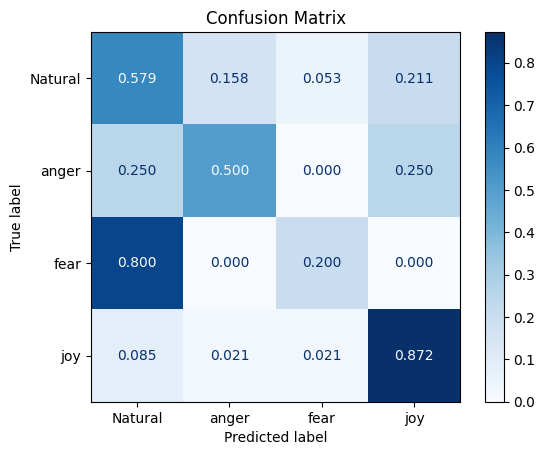

              precision    recall  f1-score   support

     Natural       0.52      0.58      0.55        19
       anger       0.50      0.50      0.50         8
        fear       0.33      0.20      0.25         5
         joy       0.87      0.87      0.87        47

    accuracy                           0.72        79
   macro avg       0.56      0.54      0.54        79
weighted avg       0.72      0.72      0.72        79



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# Get the true labels and predictions for the test dataset
y_true = test_generator.classes
predictions = xception_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Calculate the percentage confusion matrix
percentage_confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Display the percentage confusion matrix
class_names = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".3f")
plt.title("Confusion Matrix")
plt.show()

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

2/2 [==============================] - 1s 266ms/step


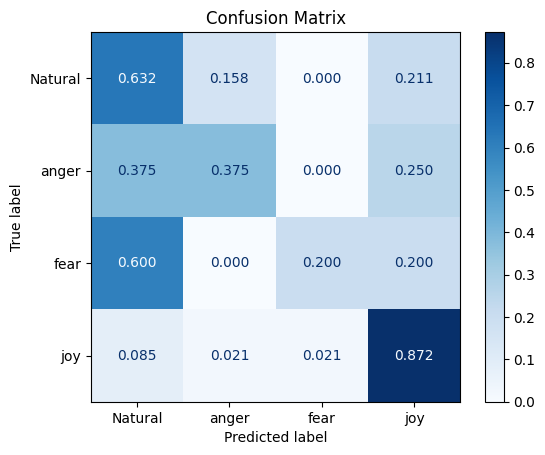

              precision    recall  f1-score   support

     Natural       0.55      0.63      0.59        19
       anger       0.43      0.38      0.40         8
        fear       0.50      0.20      0.29         5
         joy       0.85      0.87      0.86        47

    accuracy                           0.72        79
   macro avg       0.58      0.52      0.53        79
weighted avg       0.71      0.72      0.71        79



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# Get the true labels and predictions for the test dataset
y_true = test_generator.classes
predictions = xception_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Calculate the percentage confusion matrix
percentage_confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Display the percentage confusion matrix
class_names = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".3f")
plt.title("Confusion Matrix")
plt.show()

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

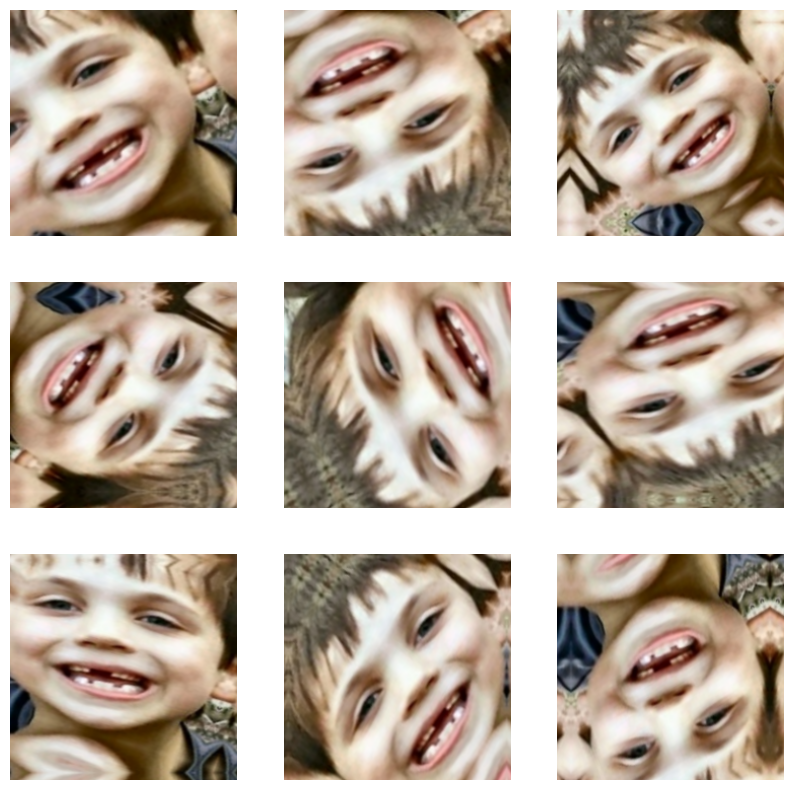

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

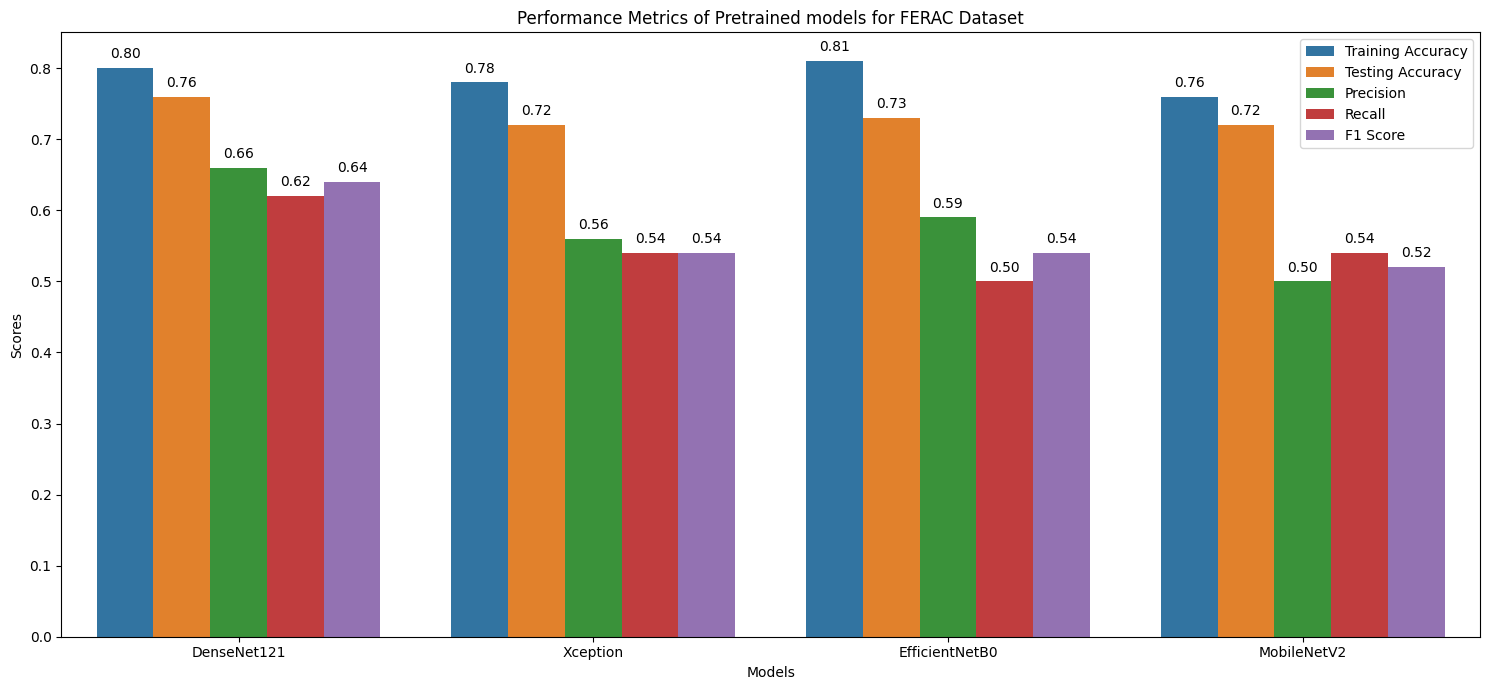

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace this with your actual data)
testing_accuracy = [0.76, 0.72, 0.73, 0.72]
training_accuracy = [0.80, 0.78, 0.81, 0.76]
precision = [0.66, 0.56, 0.59, 0.50]
recall = [0.62, 0.54, 0.50, 0.54]
f1_score = [0.64, 0.54, 0.54, 0.52]
models = ['DenseNet121', 'Xception', 'EfficientNetB0', 'MobileNetV2']

# Create a DataFrame with the data
data = {
    'Model': models,
    'Training Accuracy': training_accuracy,
    'Testing Accuracy': testing_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to include these new metrics
melted_df = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Score')

# Define a custom color palette
custom_palette = sns.color_palette("tab10", 5)  # You can adjust the number of colors here

# Plot using Seaborn with the custom color palette
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df, palette=custom_palette)

# Show the metric values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics of Pretrained models for FERAC Dataset')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



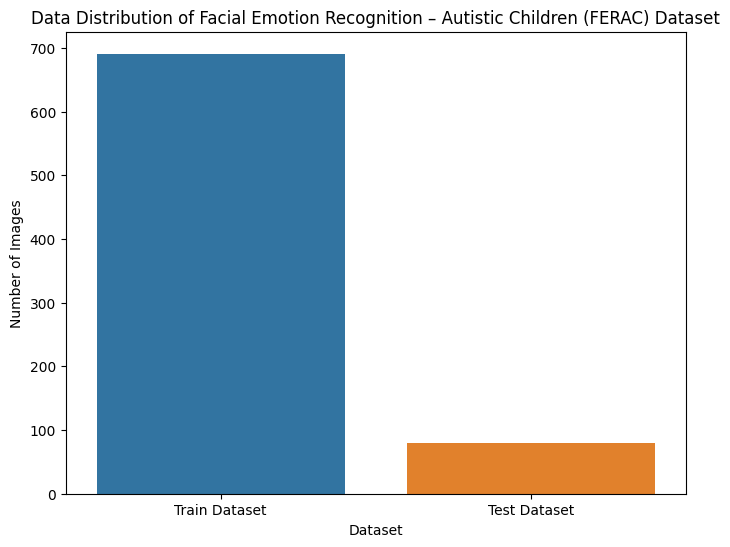

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set your train and test directories
train_dir = '/content/drive/MyDrive/Dataset/autistic child dataset/train'
test_dir = '/content/drive/MyDrive/Dataset/autistic child dataset/val'

# Count the number of images in train and test directories
def count_images(directory):
    count = sum([len(files) for _, _, files in os.walk(directory)])
    return count

train_images_count = count_images(train_dir)
test_images_count = count_images(test_dir)

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=['Train Dataset', 'Test Dataset'], y=[train_images_count, test_images_count])
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Data Distribution of Facial Emotion Recognition – Autistic Children (FERAC) Dataset')
plt.show()
